<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week13/EVA_S13_OpenCV_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!cp -rp /content/drive/My\ Drive/py_files/yolov3_cv2 /content/yolo

In [0]:
!unzip /content/yolo/yolov3_cv2/yolo_object_detection.zip

Archive:  /content/yolo/yolov3_cv2/yolo_object_detection.zip
  inflating: room_ser.jpg            
  inflating: yolo_object_detection.py  
  inflating: coco.names              
  inflating: yolov3.cfg              


In [0]:
import cv2
import numpy as np

In [0]:
net = cv2.dnn.readNet("/content/yolo/yolov3_cv2/yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
img = cv2.imread("/content/IMG_20200425_114954647.jpg")
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [0]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [0]:
class_ids,confidences,class_ids

([63, 0, 66, 73],
 [0.9942638278007507,
  0.993441104888916,
  0.9982025623321533,
  0.615710437297821],
 [63, 0, 66, 73])

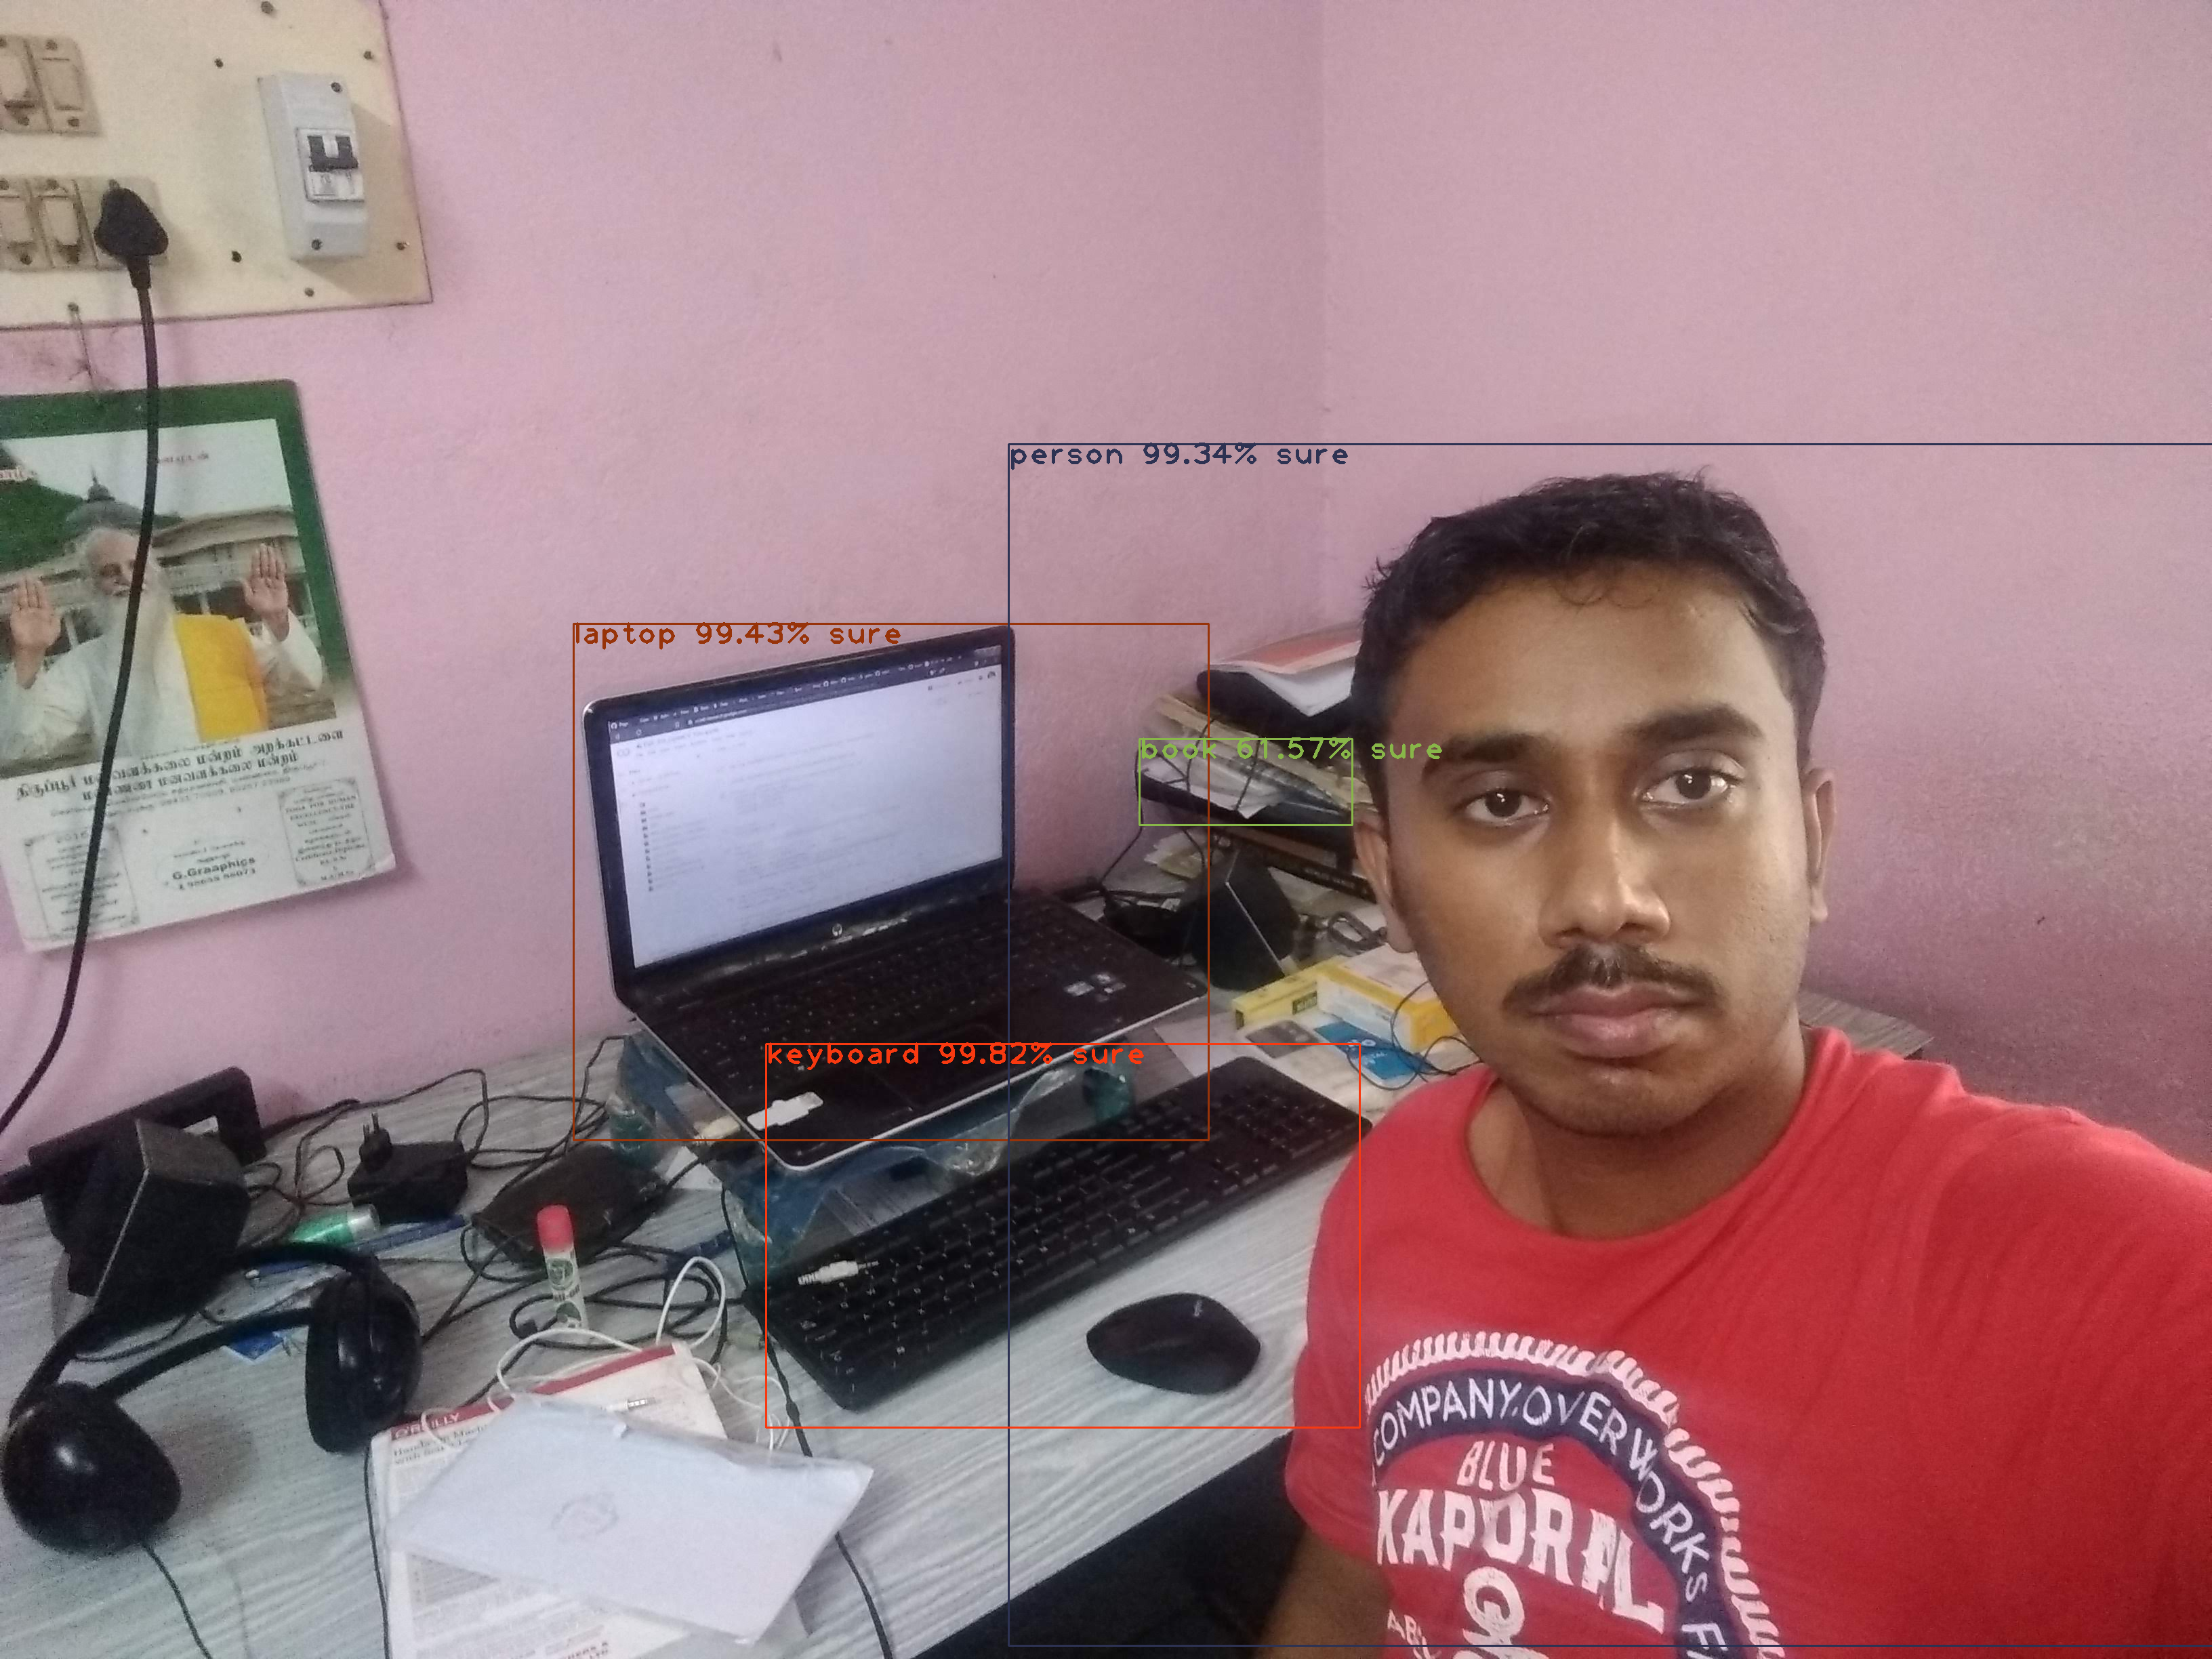

In [0]:
from google.colab.patches import cv2_imshow
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])+ " " +str(round(confidences[i]*100,2))+ "% sure"
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()